# Projects

Repository metrics that reflect how we are doing with respect to the standard components of integration with GitLab (badges/tests), and ReadTheDocs.

In [1]:
# include common code and config
# selected_pi = 15
%run PIQM_Bootstrap.ipynb

{'pi': 'PI15', 'id': 15, 'start': '2022-06-15T00:00:00Z', 'started': '2022-06-15', 'finish': '2022-09-13T23:59:59Z'}


In [2]:
query_api = client.query_api()
df_projects = query_api.query_data_frame(
    """from(bucket: "gitlab_metrics")
  |> range(start: 2008-03-17T00:00:00Z, stop: {0[finish]})
  |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_pipeline_duration")
  |> drop(columns:["pipeline_last_run_status", "_measurement", "license", "_field"])
  """.format(current_pi))

df_projects


result  table                    _start                     _stop  \
0    _result      0 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
1    _result      1 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
2    _result      2 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
3    _result      3 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
4    _result      4 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
..       ...    ...                       ...                       ...   
275  _result    275 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
276  _result    276 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
277  _result    277 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
278  _result    278 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   
279  _result    279 2008-03-17 00:00:00+00:00 2022-09-13 23:59:59+00:00   

                               _time  _value got_coverage got_linting got_rtd  \
0   2019-06-12 19:40:49.861000+00:00   965.0            0           0       0   
1   2019-06-20 23:38:55.130000+00:00   117.0            0           0       0   
2   2019-07-18 08:47:30.836000+00:00   233.0            0           0       0   
3   2019-07-29 06:13:06.162000+00:00   204.0            0           0       0   
4   2019-08-28 00:17:33.095000+00:00  1079.0            0           0       0   
..                               ...     ...          ...         ...     ...   
275 2022-06-20 10:07:13.589000+00:00   313.0            1           1       1   
276 2022-06-28 08:49:15.841000+00:00   564.0            1           1       1   
277 2022-07-05 14:23:47.530000+00:00   173.0            1           1       1   
278 2018-10-24 08:40:54.932000+00:00   712.0            1           1       1   
279 2018-11-29 08:22:28.969000+00:00  2427.0            1           1       1   

    got_tests        id                                           project  
0           0  12828461               ska-telescope/sdp/ska-sdp-par-model  
1           0  12962462                  ska-telescope/pst/ska-pst-docker  
2           0  13372840             ska-telescope/ska-cicd-cpp-build-base  
3           0  13540781          ska-telescope/templates/ska-cpp-template  
4           0  14019587             ska-telescope/pst/ska-pst-dspsr-build  
..        ...       ...                                               ...  
275         1  37167217  ska-telescope/sdp/ska-sdp-data-product-dashboard  
276         1  37391632         ska-telescope/low-cbf/ska-low-cbf-sw-cnic  
277         1  37582642        ska-telescope/sdp/ska-sdp-data-product-api  
278         1   9027158                    ska-telescope/ska-tango-images  
279         1   9673989                  ska-telescope/ska-tango-examples  

[280 rows x 12 columns]

In [3]:
pis = the_pis.copy()
current = pis.pop(-1)
pi_list = ([current] + pis[: (selected_pi - select_pis) : -1])[::-1]

template_project_trace = """

{0[pi]} = from(bucket: "gitlab_metrics")
  |> range(start: {0[start]}, stop: {0[finish]})
  |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_pipeline_duration")
  |> drop(columns:["pipeline_last_run_status", "_measurement", "license", "_field"])
  |> set(key: "ID",value: "{0[id]}")
  |> set(key: "PI",value: "{0[pi]} ({0[started]})")
"""

# output all the series in reverse order
query = []
tables = ", ".join([pi["pi"] for pi in pi_list])
for pi in pi_list:
#     pi["current_start"] = last_start
    query.append(template_project_trace.format(pi))
query.append("""
union(tables: [{}])
  |> group()
  |> yield(name: "projects")
""".format(
        tables
    )
)
query = "\n".join(query)

# print(query)

query_api = client.query_api()

projects = query_api.query_data_frame(query)
# mrs = mrs[["_value", "_field"]]\
#     .rename(columns={"_value": "Merge Requests", "_field": "PI"})
projects['ID'] = projects['ID'].astype(int)
projects.sort_values(by=['ID', '_time'], ascending=[True, True], inplace=True)
projects

result  table                    _start                     _stop  \
10   projects      0 2021-06-16 00:00:00+00:00 2021-09-15 23:59:59+00:00   
7    projects      0 2021-06-16 00:00:00+00:00 2021-09-15 23:59:59+00:00   
0    projects      0 2021-06-16 00:00:00+00:00 2021-09-15 23:59:59+00:00   
1    projects      0 2021-06-16 00:00:00+00:00 2021-09-15 23:59:59+00:00   
2    projects      0 2021-06-16 00:00:00+00:00 2021-09-15 23:59:59+00:00   
..        ...    ...                       ...                       ...   
108  projects      0 2022-06-15 00:00:00+00:00 2022-09-13 23:59:59+00:00   
109  projects      0 2022-06-15 00:00:00+00:00 2022-09-13 23:59:59+00:00   
110  projects      0 2022-06-15 00:00:00+00:00 2022-09-13 23:59:59+00:00   
111  projects      0 2022-06-15 00:00:00+00:00 2022-09-13 23:59:59+00:00   
112  projects      0 2022-06-15 00:00:00+00:00 2022-09-13 23:59:59+00:00   

                               _time  _value got_coverage got_linting got_rtd  \
10  2021-06-17 08:36:55.759000+00:00   781.0            1           1       1   
7   2021-06-22 10:48:40.343000+00:00   432.0            1           1       0   
0   2021-07-06 11:52:02.302000+00:00  9381.0            0           0       0   
1   2021-07-07 10:39:50.629000+00:00     0.0            0           0       0   
2   2021-07-07 14:14:29.795000+00:00     0.0            0           0       0   
..                               ...     ...          ...         ...     ...   
108 2022-08-10 07:26:58.043000+00:00    31.0            0           0       0   
109 2022-08-15 12:55:27.117000+00:00     0.0            0           0       0   
110 2022-08-15 12:56:50.894000+00:00     0.0            0           0       0   
111 2022-08-16 11:09:01.847000+00:00     0.0            0           0       0   
112 2022-08-17 08:04:27.998000+00:00     0.0            0           0       0   

    got_tests        id                                            project  \
10          1  27507143                        ska-telescope/db/ska-db-oda   
7           1  27617456  ska-telescope/ska-tango-taranta-group/ska-tang...   
0           0  27938024               ska-telescope/pss/ska-pss-ci-systems   
1           0  27962496     ska-telescope/ska-post-correlation-rfi-flagger   
2           0  27966946  ska-telescope/sdi/ska-cicd-training-containeri...   
..        ...       ...                                                ...   
108         0  38474728    ska-telescope/ska-sdp-daliuge-palette-generator   
109         0  38597851                  ska-telescope/ska-topic-sandbox-0   
110         0  38597884                  ska-telescope/ska-topic-sandbox-1   
111         0  38627478                  ska-telescope/ska-low-mccs-common   
112         0  38656133         ska-telescope/src/src-scientific-use-cases   

     ID                 PI  
10   11  PI11 (2021-06-16)  
7    11  PI11 (2021-06-16)  
0    11  PI11 (2021-06-16)  
1    11  PI11 (2021-06-16)  
2    11  PI11 (2021-06-16)  
..   ..                ...  
108  15  PI15 (2022-06-15)  
109  15  PI15 (2022-06-15)  
110  15  PI15 (2022-06-15)  
111  15  PI15 (2022-06-15)  
112  15  PI15 (2022-06-15)  

[126 rows x 14 columns]

In [4]:
# total projects
project_stats = projects[['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()
project_stats.sort_values(by=['ID'], ascending=[True], inplace=True)
project_stats['total'] = project_stats['id']['count']
del project_stats['id']

# projects with rtd
project_stats['rtd'] = projects[projects.got_rtd == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with coverage
project_stats['coverage'] = projects[projects.got_coverage == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with linting
project_stats['linting'] = projects[projects.got_linting == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with tests
project_stats['tests'] = projects[projects.got_tests == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

project_stats


ID                 PI total rtd coverage linting tests
                                                         
0  11  PI11 (2021-06-16)    14   5        7       7     7
1  12  PI12 (2021-09-16)    20   5       11      11    11
2  13  PI13 (2021-12-17)    27  11       17      17    17
3  14  PI14 (2022-03-16)    34  13       16      16    16
4  15  PI15 (2022-06-15)    31  12        6       6     6

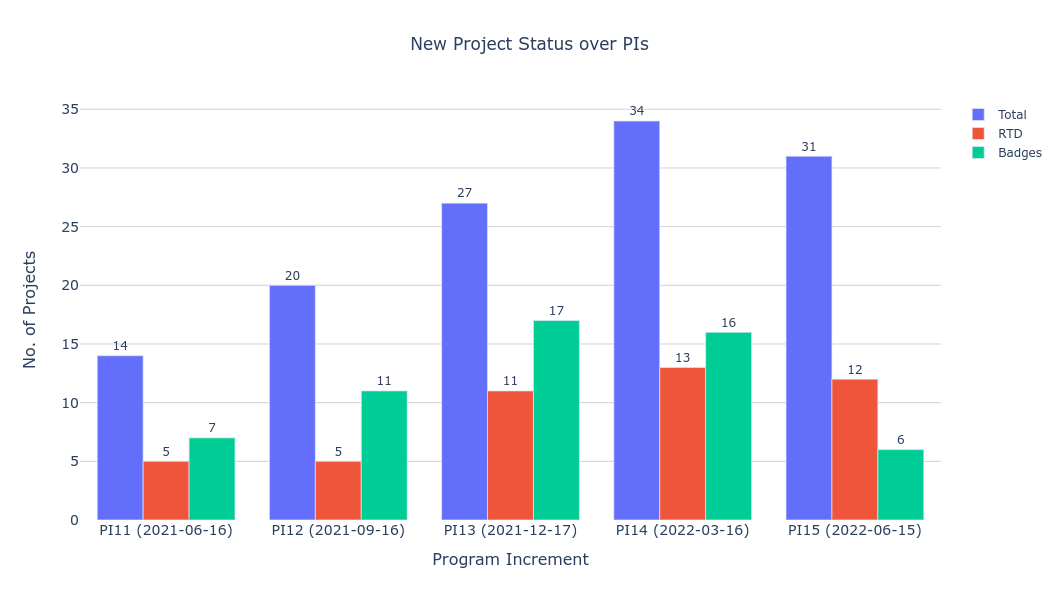

In [5]:
import plotly.graph_objects as go
stack_labels = ['{:.0f}'.format(x) for x in project_stats['total']]

fig = go.Figure(data=[go.Bar(x=project_stats.PI, y=project_stats['total'], name='Total',
     text=['{:.0f}'.format(x) for x in project_stats['total']]),
             go.Bar(x=project_stats.PI, y=project_stats['rtd'], name='RTD',
     text=['{:.0f}'.format(x) for x in project_stats['rtd']]),
             go.Bar(x=project_stats.PI, y=project_stats['linting'], name='Badges',
     text=['{:.0f}'.format(x) for x in project_stats['linting']]),         
                     ])
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_traces( textposition='outside')
fig.update_layout(barmode='group', yaxis=dict(
        title='No. of Projects',
        titlefont_size=16,
        tickfont_size=14,
    ), xaxis=dict(
        title='Program Increment',
        titlefont_size=16,
        tickfont_size=14,
    ), height=600, title='New Project Status over PIs', title_x=0.5, paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()
